<a href="https://colab.research.google.com/github/leonnmarcoo/CCADMACL_COM232_PROJECT/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

## **Import**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

## **Load the dataset**

In [62]:
df = pd.read_csv("cleaned_data.csv")

## **Understanding the Data**

In [63]:
df.head()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,genres_Action,genres_Adventure,...,company_The,company_Touchstone Pictures,company_TriStar Pictures,company_Twentieth Century Fox Film Corporation,company_United Artists,company_Universal Pictures,company_Village Roadshow Pictures,company_Walt Disney Pictures,company_Warner Bros.,company_Working Title Films
0,237000000,1,150.437577,2009.0,2787965087,162.0,7.2,11800,1,1,...,0,0,0,1,0,0,0,0,0,0
1,300000000,1,139.082615,2007.0,961000000,169.0,6.9,4500,1,1,...,0,0,0,0,0,0,0,1,0,0
2,245000000,1,107.376788,2015.0,880674609,148.0,6.3,4466,1,1,...,0,0,0,0,0,0,0,0,0,0
3,250000000,1,112.312950,2012.0,1084939099,165.0,7.6,9106,1,0,...,0,0,0,0,0,0,0,0,1,0
4,260000000,1,43.926995,2012.0,284139100,132.0,6.1,2124,1,1,...,0,0,0,0,0,0,0,1,0,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 53 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   budget                                          4800 non-null   int64  
 1   homepage                                        4800 non-null   int64  
 2   popularity                                      4800 non-null   float64
 3   release_date                                    4800 non-null   float64
 4   revenue                                         4800 non-null   int64  
 5   runtime                                         4800 non-null   float64
 6   vote_average                                    4800 non-null   float64
 7   vote_count                                      4800 non-null   int64  
 8   genres_Action                                   4800 non-null   int64  
 9   genres_Adventure                         

In [65]:
df.describe()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,genres_Action,genres_Adventure,...,company_The,company_Touchstone Pictures,company_TriStar Pictures,company_Twentieth Century Fox Film Corporation,company_United Artists,company_Universal Pictures,company_Village Roadshow Pictures,company_Walt Disney Pictures,company_Warner Bros.,company_Working Title Films
count,4.800000e+03,4800.000000,4800.000000,4800.000000,4.800000e+03,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,...,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,2.906007e+07,0.356667,21.505569,2002.463542,8.231205e+07,106.898125,6.094458,690.646875,0.240208,0.164583,...,0.011458,0.024583,0.011458,0.046250,0.015625,0.064792,0.016875,0.023750,0.066458,0.011042
std,4.073029e+07,0.479065,31.822163,12.414304,1.628950e+08,22.561593,1.188366,1234.852449,0.427254,0.370843,...,0.106440,0.154868,0.106440,0.210048,0.124033,0.246184,0.128817,0.152285,0.249108,0.104508
min,0.000000e+00,0.000000,0.000372,1916.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+05,0.000000,4.682212,1999.000000,0.000000e+00,94.000000,5.600000,54.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000e+07,0.000000,12.928897,2005.000000,1.918199e+07,103.000000,6.200000,236.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000e+07,1.000000,28.350628,2011.000000,9.293886e+07,118.000000,6.800000,737.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,1.000000,875.581305,2017.000000,2.787965e+09,338.000000,10.000000,13752.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Data Visualization**

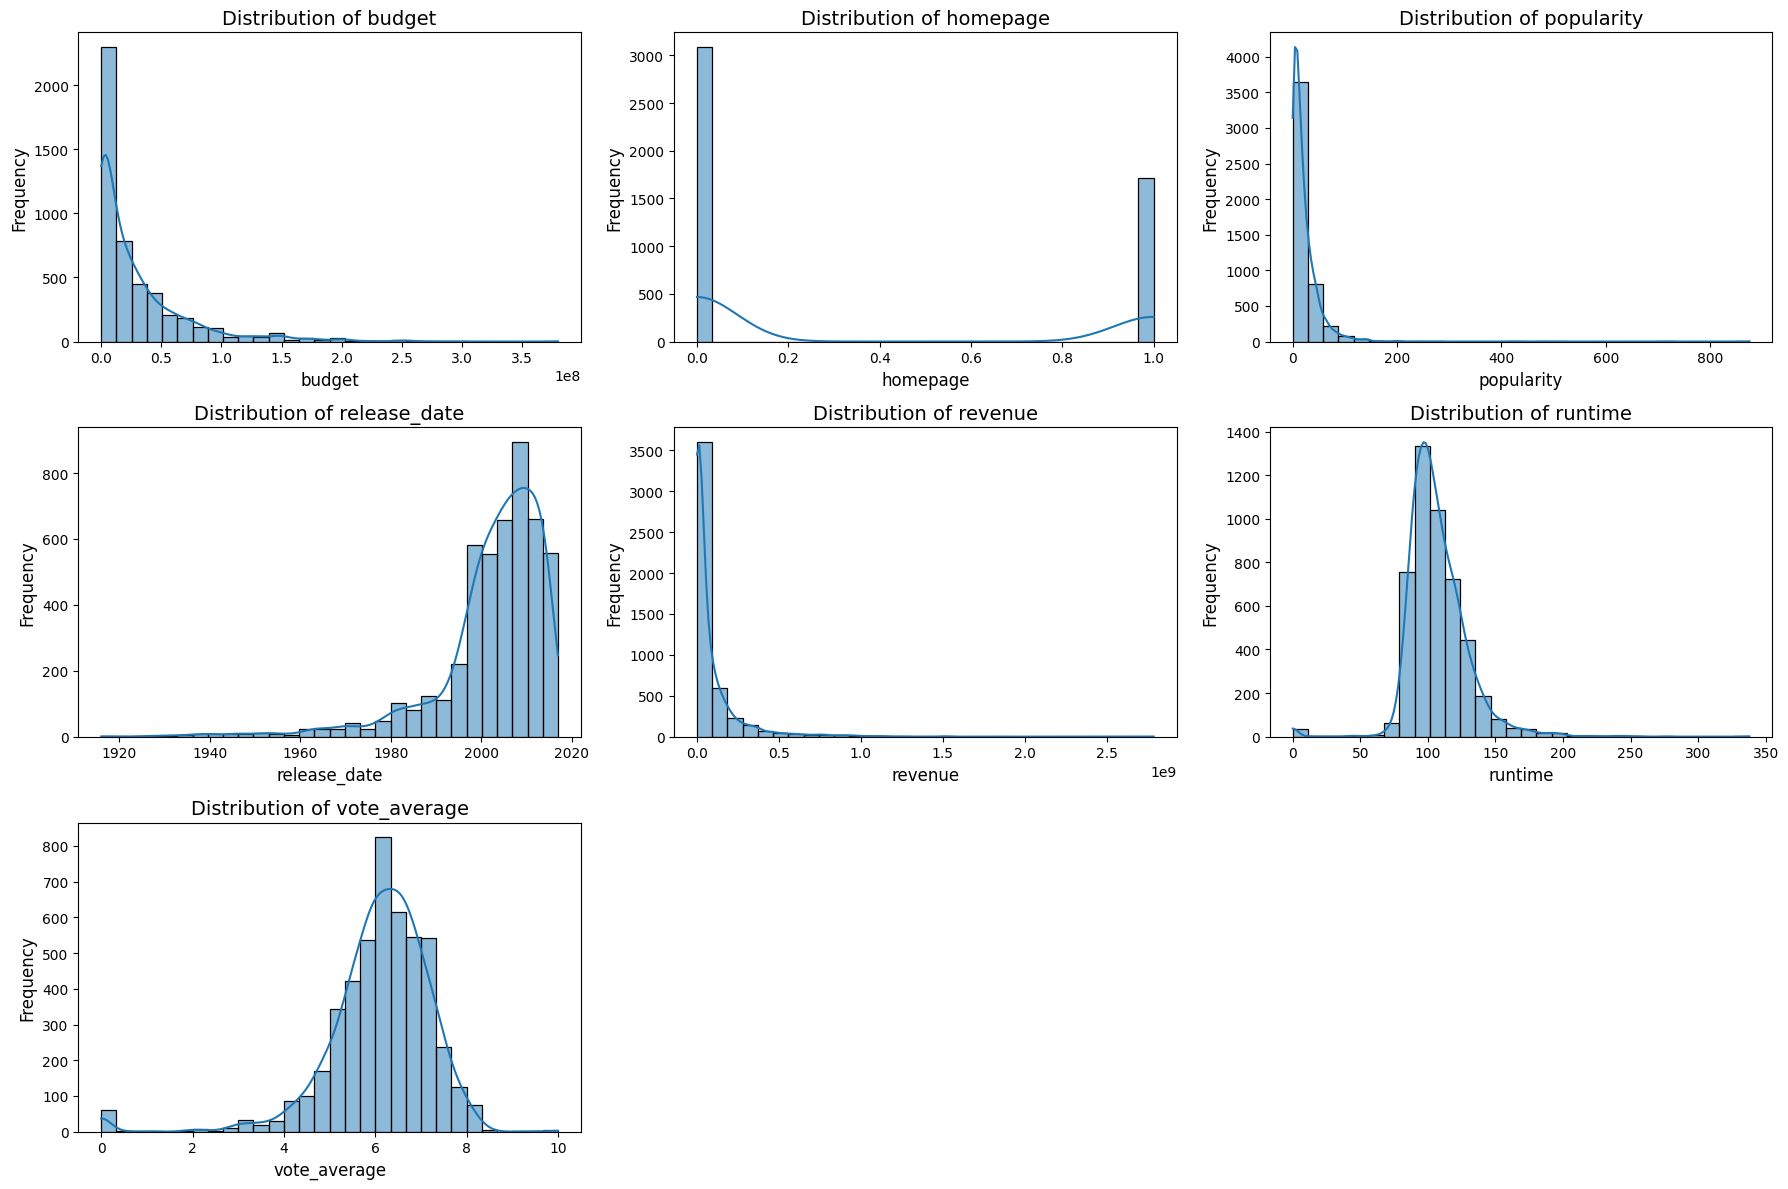

In [66]:
numerical_features = ['budget', 'homepage', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average']

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

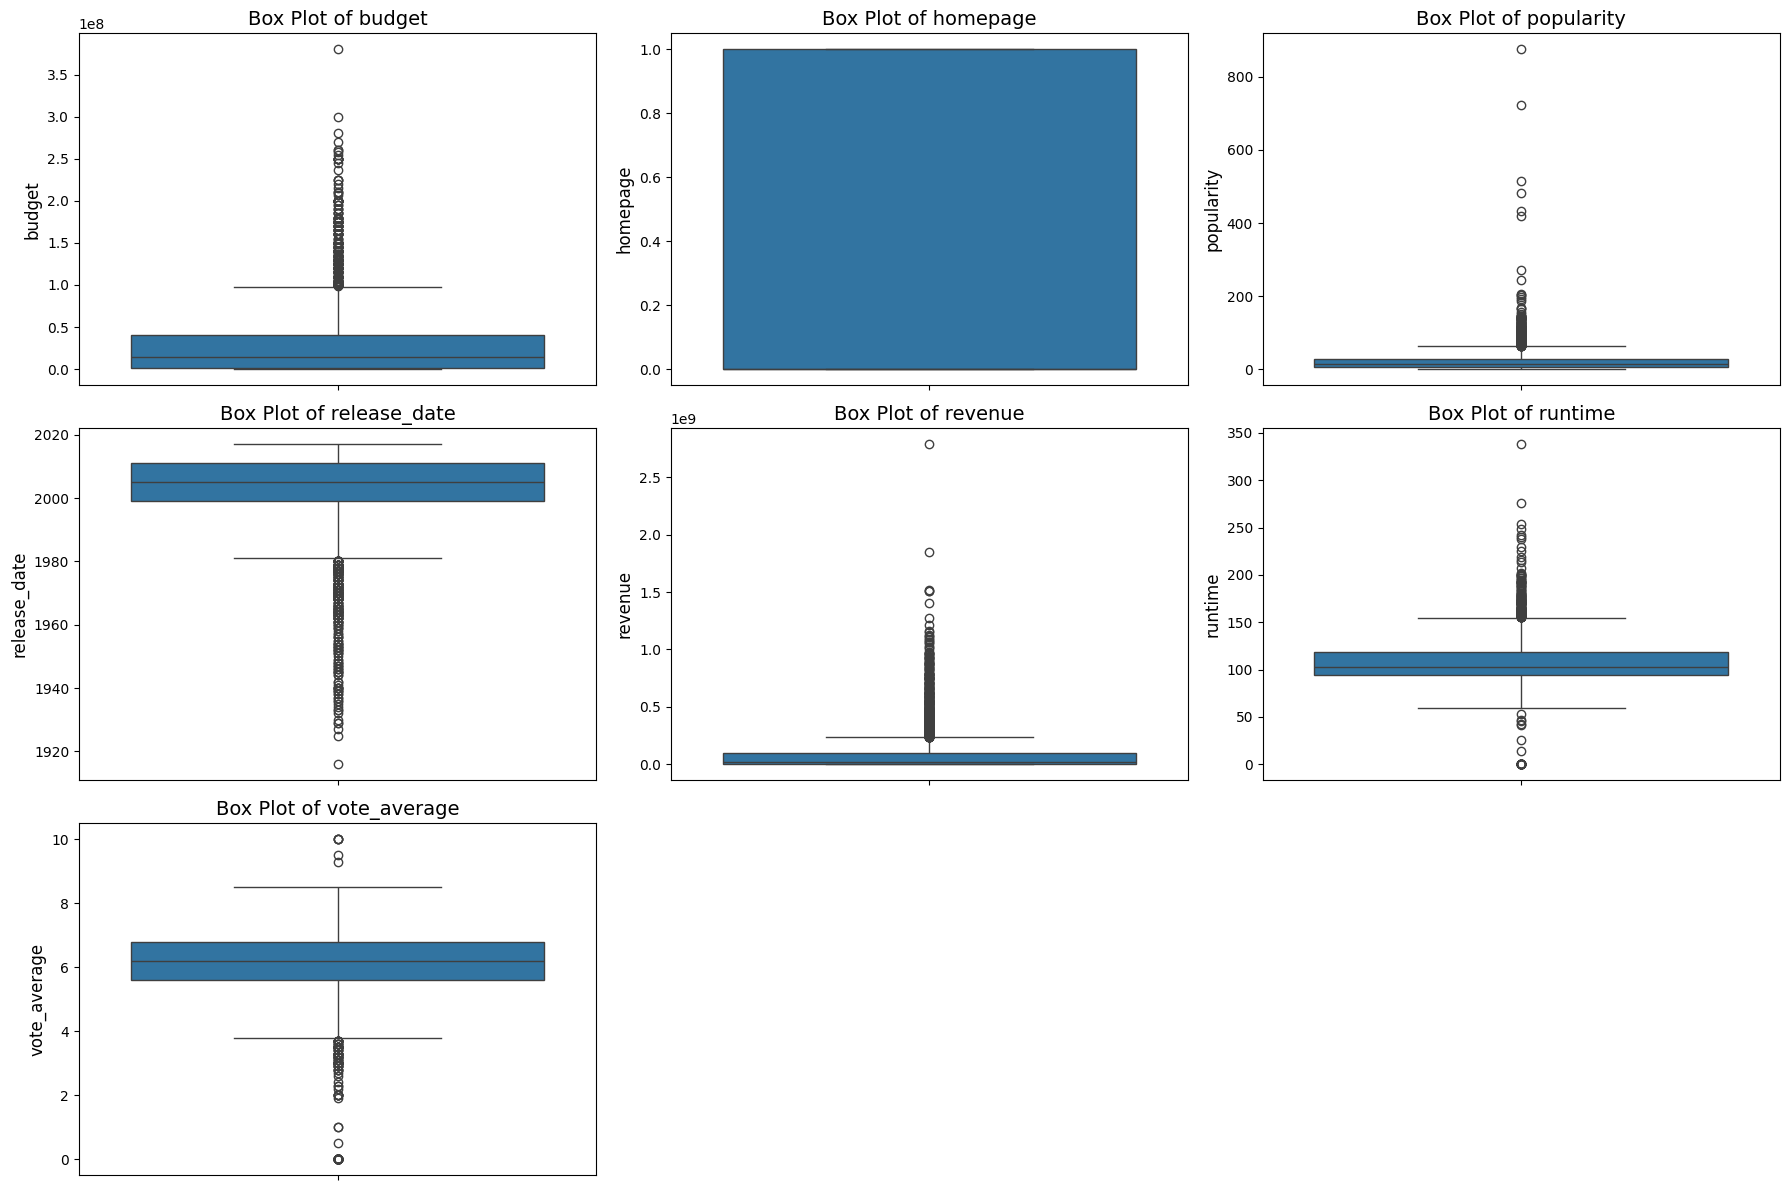

In [67]:
numerical_features = ['budget', 'homepage', 'popularity', 'release_date', 'revenue', 'runtime', 'vote_average']

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

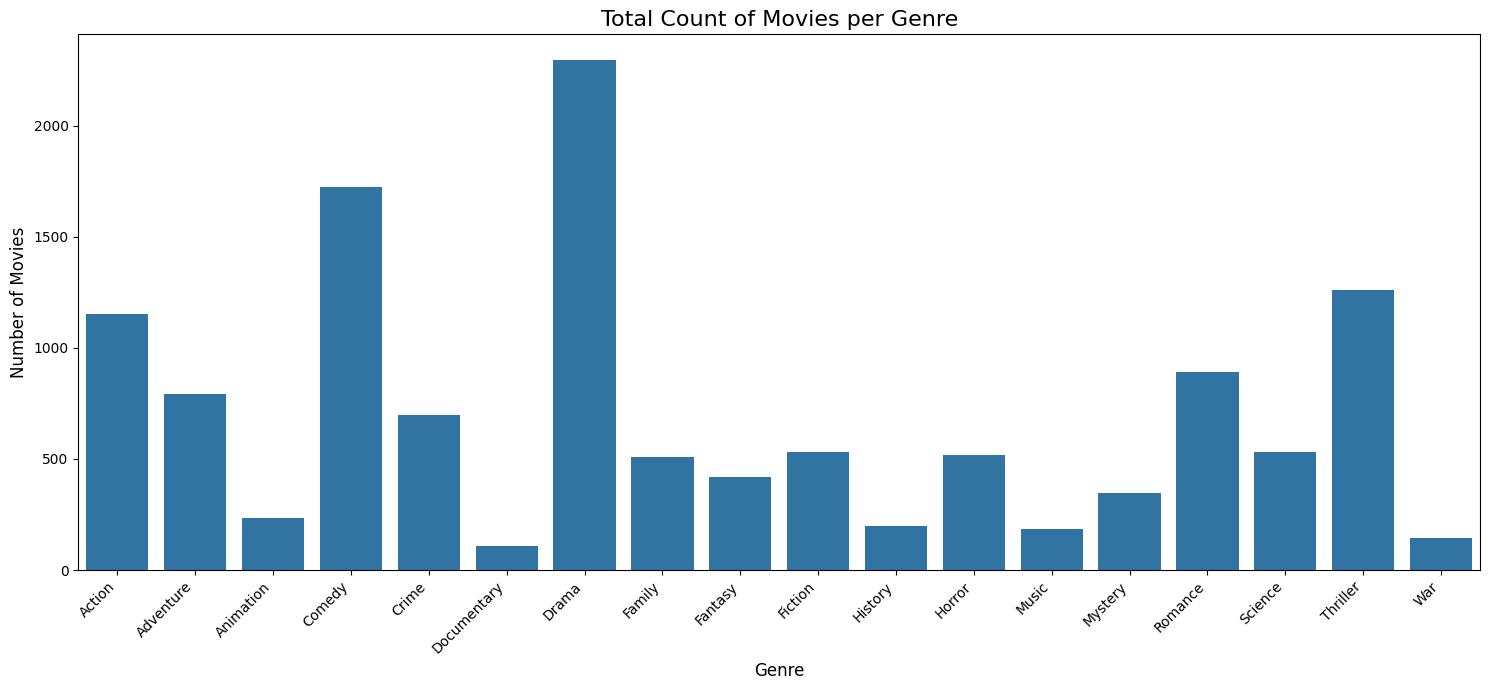

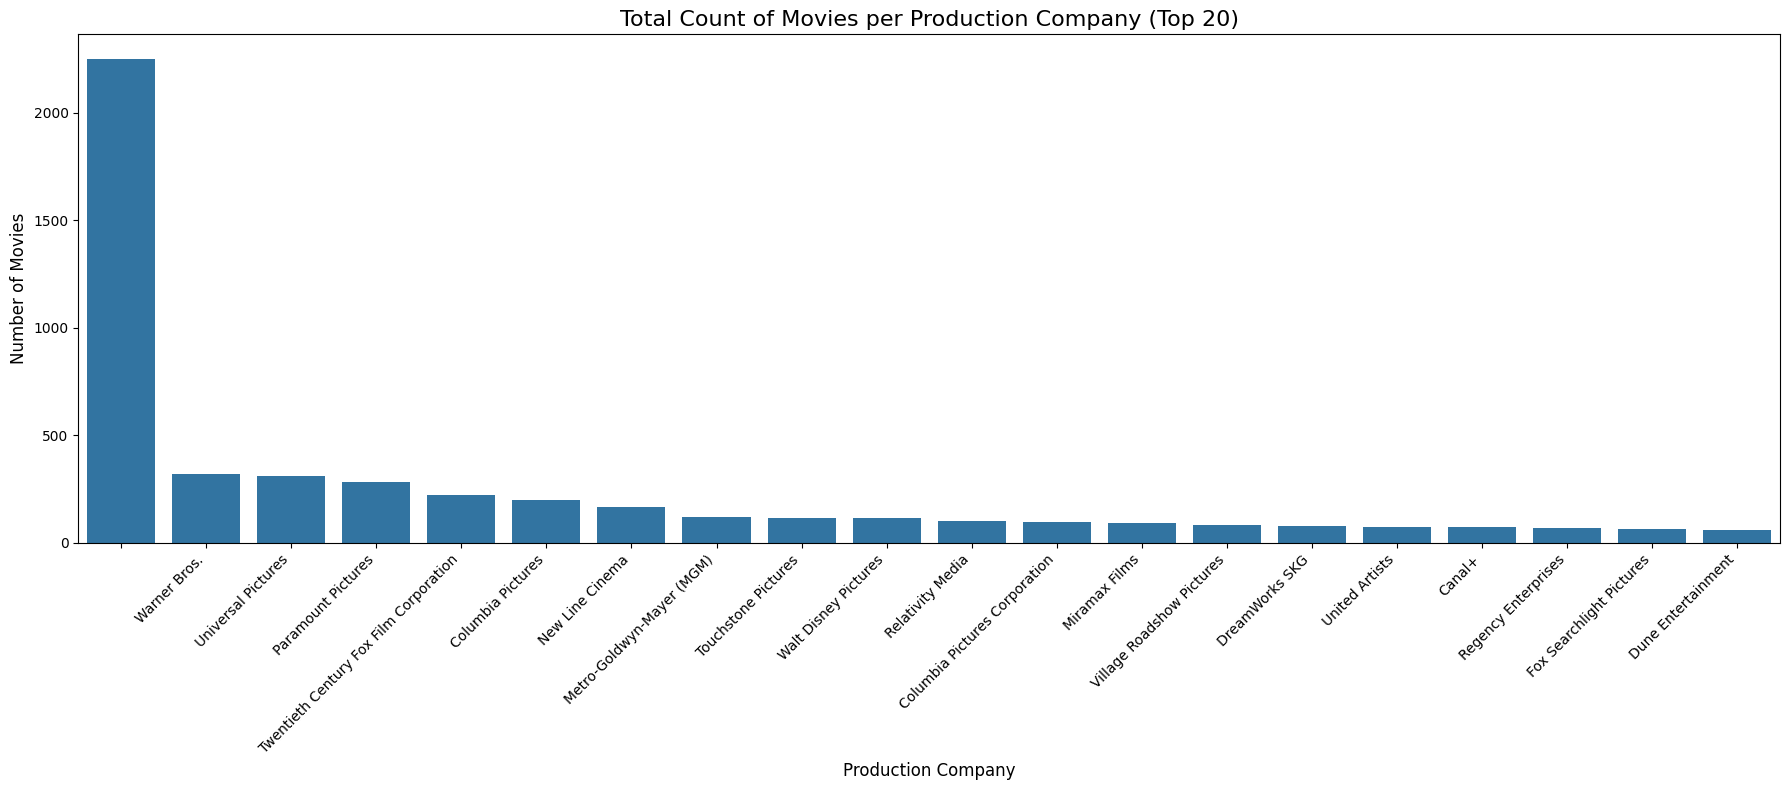

In [68]:
genres_cols = [col for col in df.columns if col.startswith('genres_')]
genre_counts = df[genres_cols].sum()
genre_counts.index = genre_counts.index.str.replace('genres_', '')

plt.figure(figsize=(15, 7))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Total Count of Movies per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

company_cols = [col for col in df.columns if col.startswith('company_')]
company_counts = df[company_cols].sum()
company_counts.index = company_counts.index.str.replace('company_', '')

company_counts = company_counts.sort_values(ascending=False).head(20)

plt.figure(figsize=(18, 8))
sns.barplot(x=company_counts.index, y=company_counts.values)
plt.title('Total Count of Movies per Production Company (Top 20)', fontsize=16)
plt.xlabel('Production Company', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

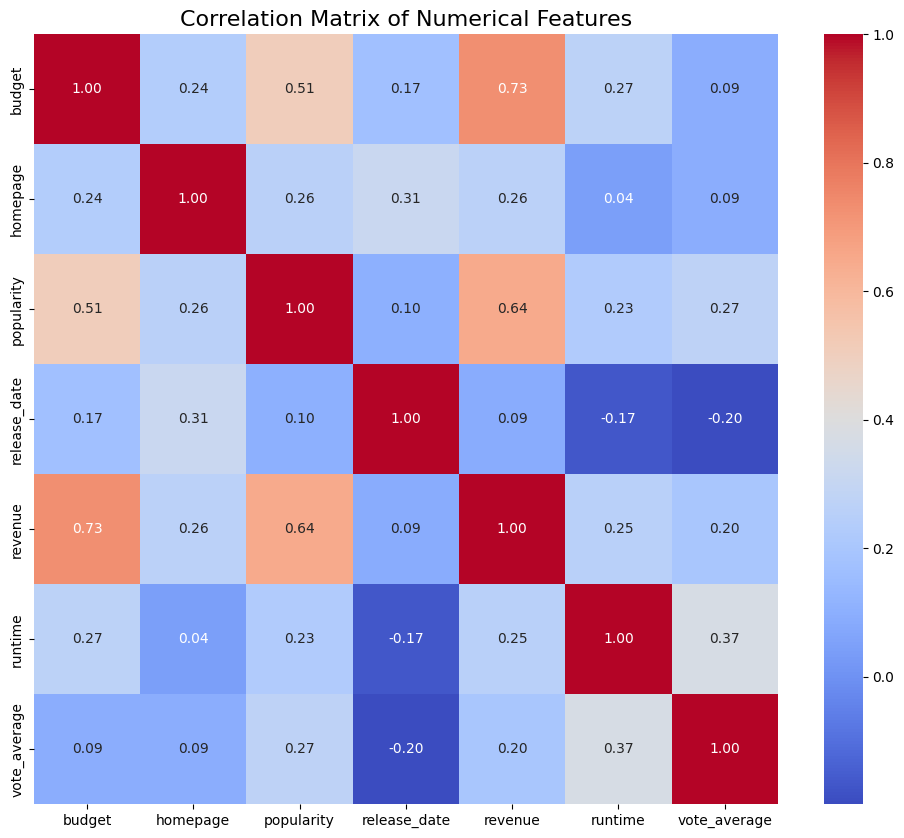

In [69]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## **Standardizing the Data**

In [70]:
features_to_standardize = ['budget', 'homepage', 'popularity', 'revenue', 'runtime', 'vote_average']

scaler = StandardScaler()

df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

In [71]:
df.head()

,budget,homepage,popularity,release_date,revenue,runtime,vote_average,vote_count,genres_Action,genres_Adventure,...,company_The,company_Touchstone Pictures,company_TriStar Pictures,company_Twentieth Century Fox Film Corporation,company_United Artists,company_Universal Pictures,company_Village Roadshow Pictures,company_Walt Disney Pictures,company_Warner Bros.,company_Working Title Films
0,5.105821,1.343033,4.052064,2009.0,16.611528,2.442541,0.930401,11800,1,1,...,0,0,0,1,0,0,0,0,0,0
1,6.652742,1.343033,3.695201,2007.0,5.394760,2.752835,0.677927,4500,1,1,...,0,0,0,0,0,0,0,1,0,0
2,5.302256,1.343033,2.698753,2015.0,4.901597,1.821953,0.172980,4466,1,1,...,0,0,0,0,0,0,0,0,0,0
3,5.425027,1.343033,2.853887,2012.0,6.155692,2.575524,1.267033,9106,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5.670570,1.343033,0.704659,2012.0,1.239130,1.112709,0.004664,2124,1,1,...,0,0,0,0,0,0,0,1,0,0


## **Import the new Dataset**

In [72]:
df.to_csv('standardized_data.csv', index=False)